# About this notebook




This notebook is a very-very fast-paced example of a brief analytics project in python.  

## Goals for this module


1.  Get used to working through a python notebook and start to bulid muscle memory in executing the cells
2.  Increase your comfort navigating around Google Colab and the notebook interface for data analysis
3.  By the end of this module (notebook), you will executed python code to import, inspect, visualize, and analyze a dataset.



## The Exercise

The 2018-19 NHL All Star Weekend is occuring this weekend, so this analysis will explore NHL play-by-play data and predict the probability that a given shot on net will be a goal.

https://www.kaggle.com/kemical/kickstarter-projects



# Get the Data Final

First, lets upload the file by using a script within the Colab notebook to allow the ability to upload files from our local machine to our **temporary** cloud server doing the analytics work for us.

This takes a few minutes and is dependent on the bandwidth we have available to us.  It's just easy to think about how to share data for a project.



I am going to assume that we link the folder we need.  I shared the file within QTools, and that you have brought the file

# Get the data

First, we get the dataset.  To spare the providers servers, I have already downloaded the dataset and placed it at an alternative location for the class.

In [1]:
!wget -O shots.zip http://peter-tanner.com/moneypuck/downloads/shots_2018.zip

--2019-01-23 13:45:33--  http://peter-tanner.com/moneypuck/downloads/shots_2018.zip
Resolving peter-tanner.com (peter-tanner.com)... 52.216.131.10
Connecting to peter-tanner.com (peter-tanner.com)|52.216.131.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10586879 (10M) [application/zip]
Saving to: ‘shots.zip’

shots.zip           100%[===================>]  10.10M  66.9MB/s    in 0.2s    

2019-01-23 13:45:39 (66.9 MB/s) - ‘shots.zip’ saved [10586879/10586879]



> **NOTE**:  *Above, the use of `!` is a "magics" command and will be referenced later.  This command tells the interpreter to execute a command on the system and that it is not a valid python command. This will make sense later*

In [2]:
!ls

sample_data  shots.zip


**The** workhorse of analyzing data in python is `pandas`, a library built specifically for analytics.  I am going to load that package below and read in the csv file in 1 simple line of code.



In [0]:
# import pandas and read in the csv into a dataframe called shots
import pandas as pd
shots = pd.read_csv('shots.zip')

In [0]:
# what is the shape of the data?
shots.shape

(65497, 124)

## About the data

The data are all the shots (towards the net) for the 2018/19 season, as of 1/21/2019.  We can see there are more than 65K shots, and 124 columns of data describing those shots.

There is also a data dictionary, we will get that below.

In [0]:
# get the data dictionary for the dataset
ddurl = "http://peter-tanner.com/moneypuck/downloads/MoneyPuck_Shot_Data_Dictionary.csv"
dd = pd.read_csv(ddurl)
dd.shape

(160, 3)

In [0]:
# what does the data dictionary look like?
dd.head()

,Variable,Definition,Unnamed: 2
0,shotID,Unique id for each shot,NaN
1,homeTeamCode,"The home team in the game. For example: TOR, M...",NaN
2,awayTeamCode,The away team in the game,NaN
3,season,Season the shot took place in. Example: 2009 f...,NaN
4,isPlayoffGame,"Set to 1 if a playoff game, otherwise 0",NaN


In [0]:
## only keep the first two columns, looks like a rogue entry in the csv
dd_clean = dd[['Variable', 'Definition']]

In [0]:
## quick peak to make sure its what we expected
dd_clean.head()

,Variable,Definition
0,shotID,Unique id for each shot
1,homeTeamCode,"The home team in the game. For example: TOR, M..."
2,awayTeamCode,The away team in the game
3,season,Season the shot took place in. Example: 2009 f...
4,isPlayoffGame,"Set to 1 if a playoff game, otherwise 0"


# Explore the dataset

## Cleanup the data

In [0]:
# print out the head and tail of the data
shots.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,23.0,77.0,77.0,-20.0,20.0,0.0,0,0,0,...,78,0.135886,0.012940,0.444788,0.348042,0.017268,0.041077,0.685858,-19,-19
1,1,52.0,-38.0,38.0,-10.0,10.0,-18.4,0,0,0,...,37,0.192110,0.017118,0.437222,0.297996,0.018838,0.036716,0.656512,-10,10
2,2,49.0,46.0,46.0,-24.0,24.0,-3.4,0,0,0,...,47,0.214515,0.011393,0.420332,0.298987,0.022210,0.032564,0.719909,-23,-23
3,3,29.0,72.0,72.0,23.0,23.0,1.0,0,0,0,...,73,0.180232,0.035586,0.419079,0.308328,0.020442,0.036333,0.782247,22,22
4,4,42.0,50.0,50.0,15.0,15.0,1.0,0,0,0,...,53,0.188735,0.037394,0.415880,0.293482,0.024237,0.040272,0.685284,14,14


In [0]:
shots.tail()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
65492,325,62.0,41.0,41.0,-39.0,39.0,0.0,0,0,0,...,43,0.121661,0.009361,0.475700,0.339754,0.022325,0.031199,0.570096,-38,-38
65493,326,16.0,-81.0,81.0,-14.0,14.0,-18.0,0,0,0,...,81,0.193698,0.131337,0.351657,0.221890,0.029867,0.071551,0.761605,-14,14
65494,327,55.0,39.0,39.0,24.0,24.0,-33.6,0,0,0,...,41,0.195099,0.011838,0.432085,0.306366,0.018286,0.036327,0.690574,23,23
65495,328,57.0,32.0,32.0,2.0,2.0,7.0,0,0,0,...,34,0.177848,0.019509,0.415977,0.323225,0.024759,0.038682,0.662401,2,2
65496,329,18.0,-74.0,74.0,9.0,9.0,4.8,0,120,112,...,74,0.245139,0.056891,0.330003,0.245698,0.063091,0.059177,0.859872,9,-9


In [0]:
# what are the column names
import numpy as np
cols = shots.columns
print(np.array(cols))

['shotID' 'arenaAdjustedShotDistance' 'arenaAdjustedXCord'
 'arenaAdjustedXCordABS' 'arenaAdjustedYCord' 'arenaAdjustedYCordAbs'
 'averageRestDifference' 'awayEmptyNet' 'awayPenalty1Length'
 'awayPenalty1TimeLeft' 'awaySkatersOnIce' 'awayTeamCode' 'awayTeamGoals'
 'defendingTeamAverageTimeOnIce'
 'defendingTeamAverageTimeOnIceOfDefencemen'
 'defendingTeamAverageTimeOnIceOfDefencemenSinceFaceoff'
 'defendingTeamAverageTimeOnIceOfForwards'
 'defendingTeamAverageTimeOnIceOfForwardsSinceFaceoff'
 'defendingTeamAverageTimeOnIceSinceFaceoff'
 'defendingTeamDefencemenOnIce' 'defendingTeamForwardsOnIce'
 'defendingTeamMaxTimeOnIce' 'defendingTeamMaxTimeOnIceOfDefencemen'
 'defendingTeamMaxTimeOnIceOfDefencemenSinceFaceoff'
 'defendingTeamMaxTimeOnIceOfForwards'
 'defendingTeamMaxTimeOnIceOfForwardsSinceFaceoff'
 'defendingTeamMaxTimeOnIceSinceFaceoff' 'defendingTeamMinTimeOnIce'
 'defendingTeamMinTimeOnIceOfDefencemen'
 'defendingTeamMinTimeOnIceOfDefencemenSinceFaceoff'
 'defendingTeamMinTime

Ok, there is a lot to take in there, but you may have noticed that I imported `numpy`.  We will be starting with numpy shortly, but the main reason I did so was because I wanted to print **every** column name.  By default, if there print statements are large, pandas will truncate the output for printing to the screen.  I got around that by printing the columns as a numpy array.  More to come.

I don't want all of the columns, so I am going to hand pick a few of the main variables of interest,  but before I make my decision, let's look at a random record's worth of data.

In [0]:
# random number
x = np.random.randint(0, len(shots)-1, 1)
print(x)

NameError: ignored

In [0]:
#@title
# set the printing to show all rows, select a record and transpose it
pd.options.display.max_rows = 999 
shots.iloc[x, :].transpose()


,26983
shotID,26983
arenaAdjustedShotDistance,48
arenaAdjustedXCord,44
arenaAdjustedXCordABS,44
arenaAdjustedYCord,-17
arenaAdjustedYCordAbs,17
averageRestDifference,25.5
awayEmptyNet,0
awayPenalty1Length,120
awayPenalty1TimeLeft,59


In [0]:
# columns to keep
keep_cols = ['shotID', 'game_id', 'event', 'goal', 'team', 'teamCode','awaySkatersOnIce', 'awayTeamCode', 
             'awayTeamGoals','homeSkatersOnIce', 'homeTeamCode', 'homeTeamGoals', 
             'homeEmptyNet','awayEmptyNet', 'shotAngle', 'shotAngleAdjusted', 'shotType', 
             'shotRush','shotRebound','xCordAdjusted','yCordAdjusted']

# select only those columns into a new dataframe called shot_data
shot_data = shots[keep_cols]

In [0]:
shot_data.shape

(65497, 21)

In [0]:
shot_data.head()

,shotID,game_id,event,goal,team,teamCode,awaySkatersOnIce,awayTeamCode,awayTeamGoals,homeSkatersOnIce,...,homeTeamGoals,homeEmptyNet,awayEmptyNet,shotAngle,shotAngleAdjusted,shotType,shotRush,shotRebound,xCordAdjusted,yCordAdjusted
0,0,20001,SHOT,0,AWAY,MTL,5,MTL,0,5,...,0,0,0,-59.931417,59.931417,BACK,0,0,78,-19
1,1,20001,SHOT,0,HOME,TOR,5,MTL,0,5,...,0,0,0,10.885527,10.885527,SNAP,0,0,37,10
2,2,20001,SHOT,0,AWAY,MTL,5,MTL,0,5,...,0,0,0,-28.705953,28.705953,WRIST,0,0,47,-23
3,3,20001,MISS,0,AWAY,MTL,5,MTL,0,5,...,0,0,0,53.972627,53.972627,SNAP,0,0,73,22
4,4,20001,SHOT,0,AWAY,MTL,5,MTL,0,5,...,0,0,0,21.250506,21.250506,SNAP,0,0,53,14


Ok, the data are much more manageable.  Let's start to really look into the data more closely.

## Look into the data

In [0]:
# what type of events exist, and how many of each - ensure missing data are INCLUDED
shot_data.event.value_counts(dropna=False)

SHOT    42790
MISS    18117
GOAL     4590
Name: event, dtype: int64

In [0]:
# what type of shots exist
shot_data['shotType'].value_counts(dropna=False, sort=False)

NaN         39
DEFL      1552
BACK      4946
SNAP      8968
WRAP       604
SLAP     10156
WRIST    34831
TIP       4401
Name: shotType, dtype: int64

Ok, we can see from above that the events all have valid values, but when looking into the shot types, there are nearly 40 records where the type is unknown.  

In [0]:
# calc the % of records with shot type unknown
sum(pd.isnull(shot_data['shotType'])) / len(shot_data)

0.0005954471197154068

Since this is such a tiny fraction of our data, remove these rows.

In [0]:
# evaluate each record to see if it is missing
type_missing = shot_data.shotType.notna()
type_missing[:5]

0    True
1    True
2    True
3    True
4    True
Name: shotType, dtype: bool

In [0]:
# keep just the records where the shotType is not missing (True)
shot_data = shot_data[type_missing]
shot_data.shape

(65458, 21)

In [0]:
# confirm that we removed the rows of interest
len(shot_data) - len(shots)

-39

In [0]:
# describe what we have (transposed for easier printing)
shot_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
shotID,65458.0,32421.161921,18904.179606,0.000000,16046.250000,32422.500000,48790.750000,65166.000000
game_id,65458.0,20377.107199,218.629243,20001.000000,20188.000000,20374.000000,20567.000000,20759.000000
goal,65458.0,0.069938,0.255044,0.000000,0.000000,0.000000,0.000000,1.000000
awaySkatersOnIce,65458.0,4.890525,0.389245,3.000000,5.000000,5.000000,5.000000,6.000000
awayTeamGoals,65458.0,1.295701,1.347718,0.000000,0.000000,1.000000,2.000000,9.000000
homeSkatersOnIce,65458.0,4.895811,0.375052,2.000000,5.000000,5.000000,5.000000,7.000000
homeTeamGoals,65458.0,1.496654,1.491121,0.000000,0.000000,1.000000,2.000000,9.000000
homeEmptyNet,65458.0,0.011779,0.107889,0.000000,0.000000,0.000000,0.000000,1.000000
awayEmptyNet,65458.0,0.014223,0.118409,0.000000,0.000000,0.000000,0.000000,1.000000
shotAngle,65458.0,-0.768746,36.216121,-88.567904,-28.369046,0.000000,27.149682,88.567904


In [0]:
# confirm there are no other missing data
shot_data.isnull().sum()

shotID               0
game_id              0
event                0
goal                 0
team                 0
teamCode             0
awaySkatersOnIce     0
awayTeamCode         0
awayTeamGoals        0
homeSkatersOnIce     0
homeTeamCode         0
homeTeamGoals        0
homeEmptyNet         0
awayEmptyNet         0
shotAngle            0
shotAngleAdjusted    0
shotType             0
shotRush             0
shotRebound          0
xCordAdjusted        0
yCordAdjusted        0
dtype: int64

Ok, things are starting to take shape and it seems like we are in a good spot.  Let's look at some of the distributions and let the pictures tell a story.

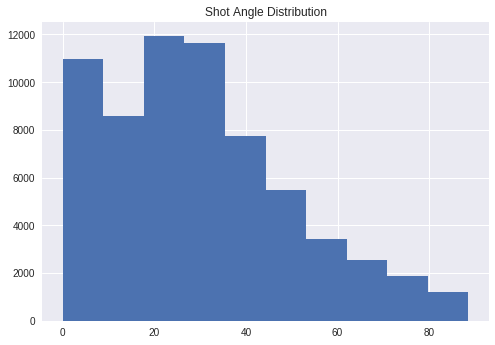

In [0]:
# plot the distribution of adjusted shot angles
import matplotlib.pyplot as plt
import numpy as np
shot_angle = np.array(shot_data.shotAngleAdjusted)
plt.hist(shot_angle)
plt.title('Shot Angle Distribution')
plt.show()

To help explain what is going on here, and why this matters, take a look at a random shot chart.


![angle](https://pbs.twimg.com/media/DvyhxeGXcAELopb.jpg)



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


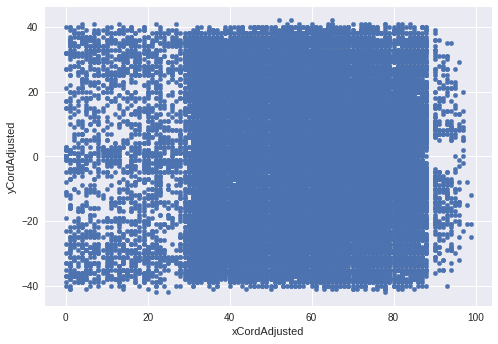

In [0]:
# how does our dataset compare
shot_data.plot.scatter(x='xCordAdjusted', y='yCordAdjusted')


This looks like half of a rink, with the goal outlined on the right.

# Fit a model to calculate goal probability

Now that we have some sense for our data, and it appears to be clean, let's fit a model to predict if a shot results in a goal.  The calculated probability of the shot becoming a goal can then become a proxy for **shot quality**.

To fit predictive models, we will be using the scikit learn package in python, the standard package for machine learning and data science modeling.

## Build the dataset for the model

In [0]:
## import the tools that we need
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
## define the feature columns (predictors)
## this selects all of the columns from the 16th index to the end of the dataset
X = shot_data.iloc[:, 16:]
X.head()

,shotType,shotRush,shotRebound,xCordAdjusted,yCordAdjusted
0,BACK,0,0,78,-19
1,SNAP,0,0,37,10
2,WRIST,0,0,47,-23
3,SNAP,0,0,73,22
4,SNAP,0,0,53,14


In [0]:
# but we need to handle the categorical data shotTYpe
shot_type_dummies = pd.get_dummies(X.shotType, drop_first=True)
shot_type_dummies.head()

,DEFL,SLAP,SNAP,TIP,WRAP,WRIST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,1,0,0,0


Ok, we dropped the first category, backhand, and will use that as our reference column, but we need to append the data back to our feature dataset, and remove the original column.

In [0]:
# append the data back onto the dataframe
X = pd.concat([X, shot_type_dummies], axis=1)
X.head()

,shotType,shotRush,shotRebound,xCordAdjusted,yCordAdjusted,DEFL,SLAP,SNAP,TIP,WRAP,WRIST,DEFL,SLAP,SNAP,TIP,WRAP,WRIST
0,BACK,0,0,78,-19,0,0,0,0,0,0,0,0,0,0,0,0
1,SNAP,0,0,37,10,0,0,1,0,0,0,0,0,1,0,0,0
2,WRIST,0,0,47,-23,0,0,0,0,0,1,0,0,0,0,0,1
3,SNAP,0,0,73,22,0,0,1,0,0,0,0,0,1,0,0,0
4,SNAP,0,0,53,14,0,0,1,0,0,0,0,0,1,0,0,0


In [0]:
# finally, drop the original column which is conviently the first in our dataset
X = X.iloc[:, 1:]
X.head()

,shotRush,shotRebound,xCordAdjusted,yCordAdjusted,DEFL,SLAP,SNAP,TIP,WRAP,WRIST,DEFL,SLAP,SNAP,TIP,WRAP,WRIST
0,0,0,78,-19,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,37,10,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,47,-23,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,73,22,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,53,14,0,0,1,0,0,0,0,0,1,0,0,0


In [0]:
## define the outcome
y = shot_data.goal
y.head()

0    0
1    0
2    0
3    0
4    0
Name: goal, dtype: int64

## Split and Train the model

In [0]:
# split the data randomly - 25% for the test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [0]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [0]:
# fit the model with data
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

> Above you see that there is a message, but it's not an error.  This is supposed to help us, and tells us the mechanics behind the algorithm will be changing in future versions of scikit learn.  It's natural to think that we did something wrong, but messages like this can happen from time to time.  The model was fit just fine.

In [0]:
# predict on the new data
y_pred=logreg.predict(X_test)

## Assess our model

Now that we have fit a model, how well did we do?

In [0]:
## import the metrics class
from sklearn import metrics

In [0]:
## print out our stats
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9307668805377329


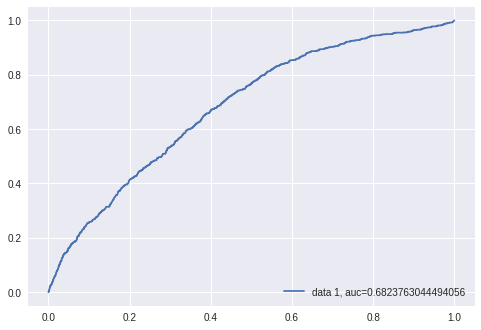

In [0]:
## create an ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
## print out the auc
auc_string = "The AUC for our model was " + str(auc)
print(auc_string)

The AUC for our model was 0.6823763044494056


This isn't the best model

![auc](https://github.com/Btibert3/public-figs/blob/master/is834/auc-ranges.png?raw=true)

# Summary

Ok, there is a lot to unpack here, but we just ran through a lot of what we will be covering this semestser.  We will be building your skills to complete a comparable exercise by the end of the semester.